<a href="https://colab.research.google.com/github/AngieOrtega09/Trabajo_Final_VPN/blob/main/Copia_de_Finanzas_computacionales_terminado_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Análisis exploratorio:
mayor_promedio: CEMARGOS 
mayor_rent_mes: CEMARGOS 
mayor_acumulada: CEMARGOS 
mas_volatil: CEMARGOS 
acciones_70pct_positivas: []


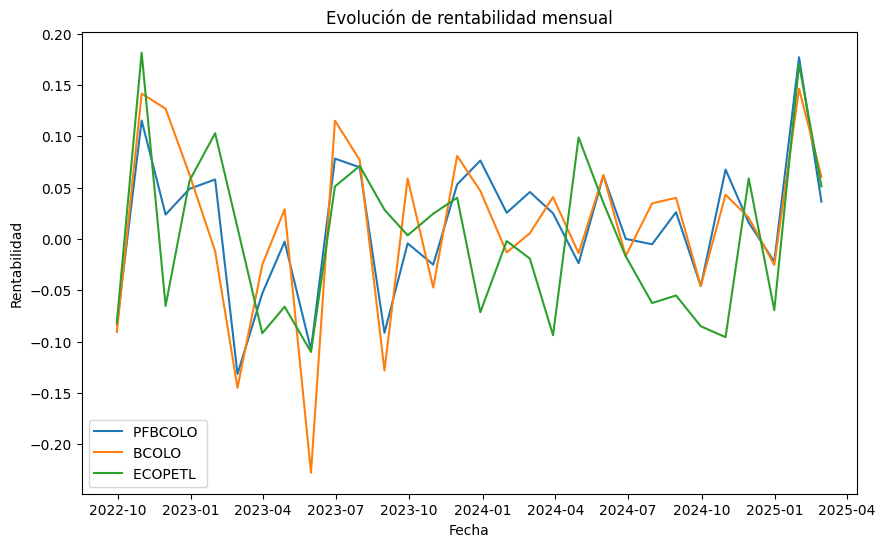

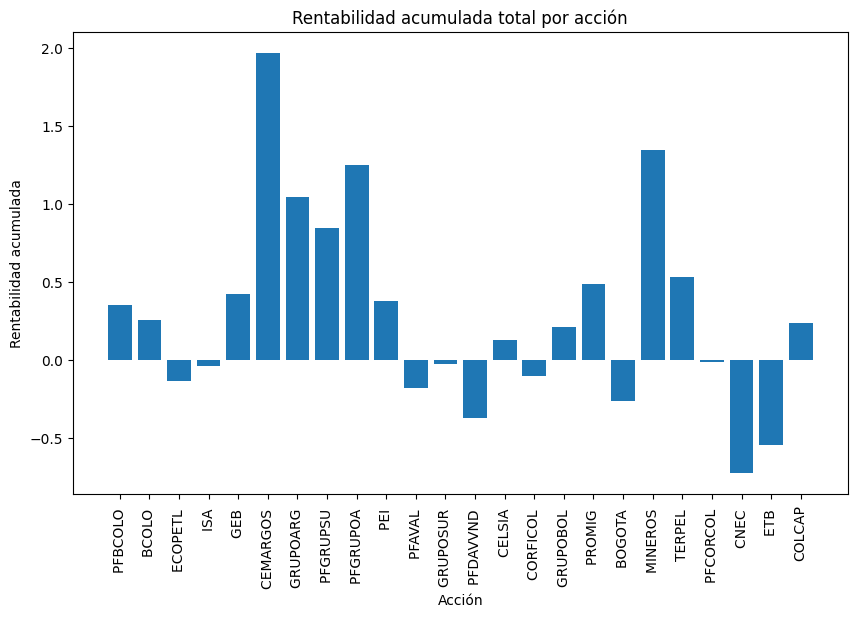

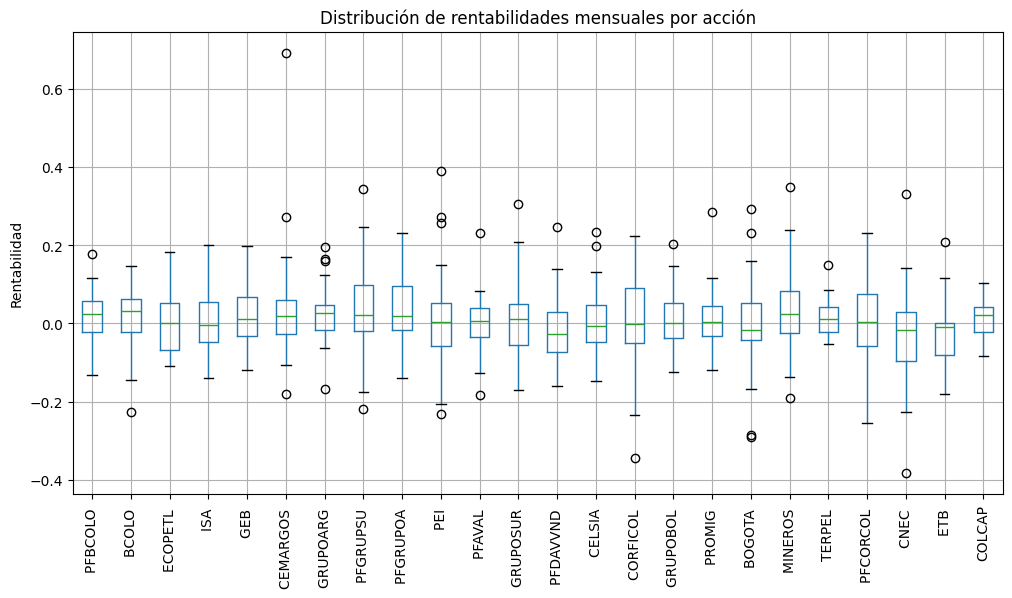

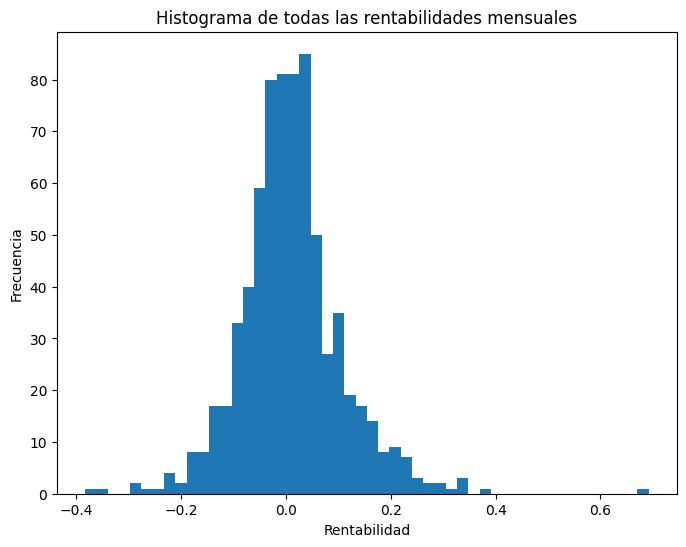


Acción con mayor rentabilidad promedio mensual: CEMARGOS 
Acción con el mayor valor mensual de rentabilidad positiva: CEMARGOS 
Acción con mayor rentabilidad acumulada total: CEMARGOS 

Cantidad de meses con rentabilidad negativa por acción:
PFBCOLO      12
BCOLO        12
ECOPETL      15
ISA          16
GEB          14
CEMARGOS      9
GRUPOARG     10
PFGRUPSU     12
PFGRUPOA     11
PEI          14
PFAVAL       13
GRUPOSUR     14
PFDAVVND     17
CELSIA       15
CORFICOL     15
GRUPOBOL     14
PROMIG       11
BOGOTA       18
MINEROS      12
TERPEL       12
PFCORCOL     15
CNEC         15
ETB          14
COLCAP       11
Name: meses_negativos, dtype: int64

Acción más volátil: CEMARGOS 

Acciones con más del 70% de meses con rentabilidad positiva:
Ninguna acción superó el 70% de meses con rentabilidad positiva en el periodo analizado.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# 1. Cargar los datos
def load_data(path):
    df = pd.read_excel(path, sheet_name=0)
    df.rename(columns={df.columns[0]: 'Fecha'}, inplace=True)
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=False, errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df.sort_values('Fecha', inplace=True)
    df.set_index('Fecha', inplace=True)
    return df

# 2. Calcular rentabilidades mensuales
def compute_returns(df):
    # Rentabilidad mensual = (Precio actual - Precio mes anterior) / Precio mes anterior
    ret = (df - df.shift(1)) / df.shift(1)
    ret = ret.dropna()
    return ret

# 3. Cálculos agregados sobre rentabilidades
def aggregate_stats(ret):
    # Filtrar el rango entre enero 2010 y febrero 2025
    ret_filtered = ret[(ret.index >= '2010-01') & (ret.index <= '2025-02')]

    stats = pd.DataFrame(index=ret_filtered.columns)
    stats['promedio_mensual'] = ret_filtered.mean()
    stats['min_mensual'] = ret.min()  # sobre todos los meses, como solicita el enunciado
    stats['max_mensual'] = ret.max()

    # Rentabilidad acumulada entre enero 2010 y febrero 2025
    stats['acumulada_total'] = (1 + ret_filtered).prod() - 1

    stats['volatilidad'] = ret_filtered.std()
    stats['meses_negativos'] = (ret_filtered < 0).sum()
    stats['pct_meses_positivos'] = (ret_filtered > 0).sum() / len(ret_filtered)
    return stats

# 4. Análisis exploratorio
def exploratory_analysis(stats):
    return {
        'mayor_promedio': stats['promedio_mensual'].idxmax(),
        'mayor_rent_mes': stats['max_mensual'].idxmax(),
        'mayor_acumulada': stats['acumulada_total'].idxmax(),
        'mas_volatil': stats['volatilidad'].idxmax(),
        'acciones_70pct_positivas': list(stats[stats['pct_meses_positivos'] > 0.7].index)
    }

# 5. Visualizaciones
def plot_returns(ret, acciones):
    plt.figure(figsize=(10,6))
    for acc in acciones:
        plt.plot(ret.index, ret[acc], label=acc)
    plt.title('Evolución de rentabilidad mensual')
    plt.xlabel('Fecha')
    plt.ylabel('Rentabilidad')
    plt.legend()
    plt.show()

def plot_acumulado(stats):
    plt.figure(figsize=(10,6))
    plt.bar(stats.index, stats['acumulada_total'])
    plt.title('Rentabilidad acumulada total por acción')
    plt.xlabel('Acción')
    plt.ylabel('Rentabilidad acumulada')
    plt.xticks(rotation=90)
    plt.show()

def plot_boxplot(ret):
    plt.figure(figsize=(12,6))
    ret.boxplot()
    plt.title('Distribución de rentabilidades mensuales por acción')
    plt.ylabel('Rentabilidad')
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram(ret):
    plt.figure(figsize=(8,6))
    plt.hist(ret.values.flatten(), bins=50)
    plt.title('Histograma de todas las rentabilidades mensuales')
    plt.xlabel('Rentabilidad')
    plt.ylabel('Frecuencia')
    plt.show()

if __name__ == '__main__':
    path = '/content/drive/MyDrive/BD2025_01.xlsx'  # Ajustar según tu ruta en Google Drive

    try:
        df = load_data(path)
    except FileNotFoundError:
        print(f"Error: no se encontró el archivo '{path}'. Verifica la ruta.")
        exit(1)
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        exit(1)

    try:
        ret = compute_returns(df)
    except Exception as e:
        print(f"Error al calcular rentabilidades: {e}")
        exit(1)

    try:
        stats = aggregate_stats(ret)
    except Exception as e:
        print(f"Error al calcular estadísticas: {e}")
        exit(1)

    try:
        analysis = exploratory_analysis(stats)
        print("Análisis exploratorio:")
        for key in analysis:
            print(f"{key}: {analysis[key]}")
    except Exception as e:
        print(f"Error en análisis exploratorio: {e}")
        exit(1)

    try:
        sample_acciones = stats.index[:3].tolist()
        if not sample_acciones:
            print("No hay datos de acciones para graficar.")
    except Exception as e:
        print(f"Error al seleccionar acciones de muestra: {e}")
        sample_acciones = []

    if sample_acciones:
        plot_returns(ret, sample_acciones)
        plot_acumulado(stats)
        plot_boxplot(ret)
        plot_histogram(ret)
    else:
        print("No se generaron gráficas por falta de datos.")

# === RESPUESTAS AL ANÁLISIS EXPLORATORIO ===
    # ¿Cuál acción tuvo la mayor rentabilidad promedio mensual?
    print("\nAcción con mayor rentabilidad promedio mensual:", analysis['mayor_promedio'])

    # ¿Cuál acción tuvo el mayor valor de rentabilidad mensual positiva en algún mes?
    print("Acción con el mayor valor mensual de rentabilidad positiva:", analysis['mayor_rent_mes'])

    # ¿Cuál acción tuvo la mayor rentabilidad acumulada total en el periodo?
    print("Acción con mayor rentabilidad acumulada total:", analysis['mayor_acumulada'])

    # ¿Cuántos meses tuvo cada acción con rentabilidad negativa?
    print("\nCantidad de meses con rentabilidad negativa por acción:")
    print(stats['meses_negativos'])

    # ¿Cuál acción fue la más volátil?
    print("\nAcción más volátil:", analysis['mas_volatil'])

    # ¿Qué acciones tuvieron más de 70% de meses con rentabilidad positiva?
    print("\nAcciones con más del 70% de meses con rentabilidad positiva:")
    acciones_positivas = analysis['acciones_70pct_positivas']
    if acciones_positivas:
        for accion in acciones_positivas:
            print("-", accion)
    else:
        print("Ninguna acción superó el 70% de meses con rentabilidad positiva en el periodo analizado.")
